In [ ]:
"""
TOPIC:
            Titanic: Machine Learning from Disaster
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
killing 1502 out of 2224 passengers and crew. 
This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 
Although there was some element of luck involved in surviving the sinking, 
some groups of people were more likely to survive than others, such as women, children, and the upper-class.
"""

In [ ]:
"""
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
"""

In [26]:
# CLASSIFICATION PROBLEM:

# logistic regression is used for classification tasks. Recall that the goal in classification tasks is to 
# find a function that maps an observation to its associated class or label. 
# A learning algorithm must use pairs of feature vectors and their corresponding labels to induce the values 
# of the mapping function's parameters that produce the best classifier, as measured by a particular performance metric. 
# In binary classification, the classifier must assign instances to one of the two classes. 
# Examples of binary classification include predicting whether or not a patient has a particular disease, 
# whether or not an audio sample contains human speech,
# whether the price of stock will rise or fall,
# whether the product will perform well or not.

In [27]:
# Binary classification with logistic regression


# Ordinary linear regression assumes that the response variable is normally distributed. 
# The normal distribution, also known as the Gaussian distribution or bell curve, 
# is a function that describes the probability that an observation will have a value between any two real numbers. 
# Normally distributed data is symmetrical. That is, half of the values are greater than the mean and 
# the other half of the values are less than the mean. The mean, median, and mode of normally distributed data 
# are also equal. Many natural phenomena approximately follow normal distributions. 
# For instance, the height of people is normally distributed; most people are of average height, a few are tall, 
# and a few are short.

In [28]:
# In some problems the response variable is not normally distributed. For instance,
# a coin toss can result in two outcomes: heads or tails. 
# The Bernoulli distribution describes the probability distribution of a random variable 
# that can take the positive case with probability P or the negative case with probability 1-P. 
# If the response variable represents a probability, it must be constrained to the range {0,1}

In [29]:

# In logistic regression, the response variable describes the probability that the outcome is the positive case. 
# If the response variable is equal to or exceeds a discrimination threshold, 
# the positive class is predicted; otherwise, the negative class is predicted.
# The response variable is modeled as a function of a linear combination of 
# the explanatory variables using the logistic function. Given by the following equation, 
# the logistic function always returns a value between zero and one:
# F(t)= 1/(1+e−t)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('/Users/prakashchandraprasad/Documents/infography_technologies/2-Day-DataScience-Workshop/classification_problem/titanic_data/train.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
col = df.columns
print col

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [63]:
sns.barplot(x='Sex',y='Survived',hue="Pclass",data=df)

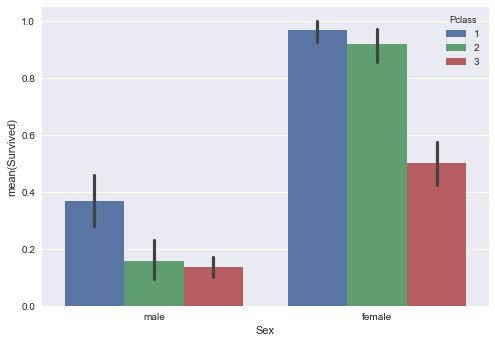

In [64]:
plt.show()

In [65]:
sns.countplot(y="Survived", data=df,hue='Pclass');

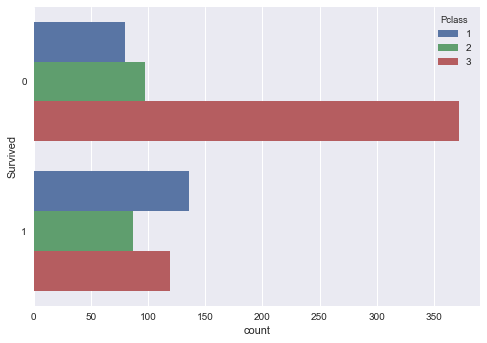

In [66]:
plt.show()

In [67]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [68]:
df['Fare'].fillna(0,inplace=True)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
enc=LabelEncoder()

In [71]:
df['Sex']=enc.fit_transform(df['Sex'])

In [72]:
X_train=df[['PassengerId','Pclass','SibSp','Parch','Fare','Age','Sex']] # select the required features
y_train=df['Survived']

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()

In [75]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
test_df = pd.read_csv('/Users/prakashchandraprasad/Documents/infography_technologies/2-Day-DataScience-Workshop/classification_problem/titanic_data/test.csv')

In [77]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [79]:
test_df['Sex']=enc.fit_transform(test_df['Sex'])

In [80]:
test_df['Fare'].fillna(0,inplace=True)
X_test = test_df[['PassengerId','Pclass','SibSp','Parch','Fare','Age','Sex']]

In [81]:
prediction = model.predict(X_test)

In [82]:
print prediction

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [83]:
test_df['Survived']=prediction

In [84]:
sns.barplot(x='Sex',y='Survived',hue="Pclass",data=df)

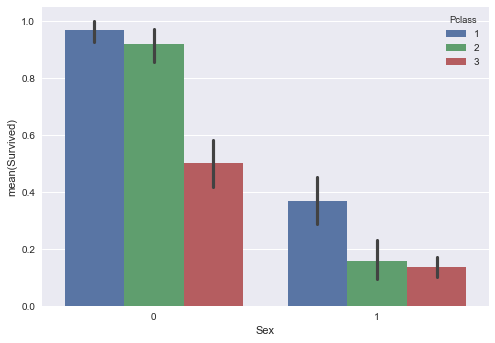

In [85]:
plt.show()

In [86]:
sns.countplot(y="Survived", data=df,hue='Pclass');

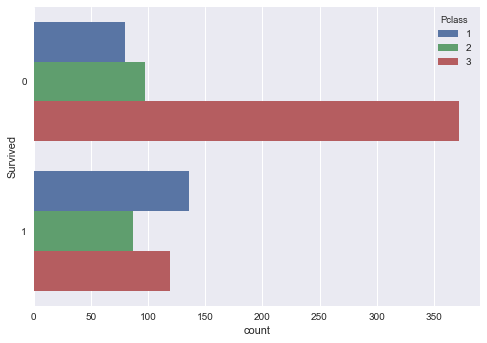

In [87]:
plt.show()